<a href="https://colab.research.google.com/github/Imran-Github22/Programming-For-Data/blob/main/8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [1]:
from numpy.lib.function_base import disp
from scipy.stats import linregress
url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'

def create_dataframe(url, db_type='csv', sheetname=None):
  import pandas as pd
  if db_type == 'csv':
    df = pd.read_csv(url)
  elif db_type == 'excel':
    if sheetname == None:
      df = pd.read_excel(url)
    else:
      df = pd.read_excel(url, sheet_name=sheetname)
  else:
    df = pd.read_csv(url)
  return df

def show_regression(x, y):
  # Calculate regression for the variables
  regression = linregress(x,y)
  # Get slope value
  slope = regression.slope
  # Get intercept value
  intercept = regression.intercept
  # Get r value
  r_value = regression.rvalue
  # Get p value
  p_value = regression.pvalue
  # Return and display the values
  return regression, slope, intercept, r_value, p_value

# Create the DataFrame
county_level_df = create_dataframe(url, 'excel', 'county-level')
# Create x, y variables
x = county_level_df['Age']
y = county_level_df['Income']
# Show regression
regr_values, slope, intercept, r_value, p_value =  show_regression(x, y)

display(regr_values)
display(slope)
display(intercept)
display(r_value)

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

-0.31433084434233205

72.78388856978748

-0.14787411576068246

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [2]:
# Reassign the x variable
x = county_level_df['Population']
y = county_level_df['Income']
# Show the regression
show_regression(x, y)

(LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115),
 0.05737132629483762,
 60.95698211316883,
 0.11644142628402862,
 0.6454275157910035)

There is positive but weak correlation between Population and Income suggesting as the Population increases the Income increases.

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [4]:
# Create the DataFrame
url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'
well_df = create_dataframe(url)

# Create x, y variable
x = well_df['Stress']
y = well_df['Wellbeing']

# Regression
regr_values, slope, intercept, r_value, p_value = show_regression(x,y)

# Check the significance of the regression
def show_significance(p_value):
  if p_value < 0.05:
    print(f'The model is significant since the p value: {p_value} < 0.05')
  else:
    print(f'The model is insignificant since the p value: {p_value} >= 0.05')

# R squared
r_sqr = r_value * r_value

# Display result
display(regr_values)
print(f'r_sqr: {r_sqr}')
show_significance(p_value)



LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

r_sqr: 0.4507725540176983
The model is significant since the p value: 6.084540561441803e-07 < 0.05


# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

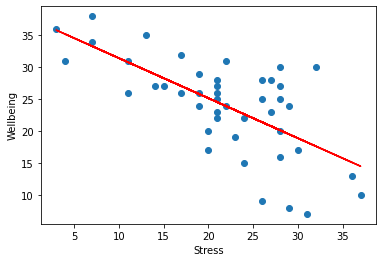

Since there is a strong negative correlation between 
Stress and Wellbeing with r value: -0.6713959740851134, 
if for example, the Stress level increases from 37 level to 47 level 
then the Wellbeing is estimated to decrease to 8.2 points.


In [22]:
# Draw the plot
def show_corr_scatterplot(x, y, slope, intercept, xlabel=None, ylabel=None):
  import matplotlib.pyplot as plt  
  # Draw the scatter graph
  plt.scatter(x,y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  # Draw the regression line and show the graph
  plt.plot(x, slope*x + intercept, color='red')
  plt.show()


# Create the Wellbeing DataFrame
url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'
well_df = create_dataframe(url)

# Create x, y variable
x = well_df['Stress']
y = well_df['Wellbeing']

# Get regression values
regr_values, slope, intercept, r_value, p_value = show_regression(x,y)

# Display
show_corr_scatterplot(x, y, slope, intercept, x.name, y.name)

# Few esimated predictions here
x_max = x.max()
x_est = x_max + 10
y_est = round((slope * x_est + intercept), 2)

print(f'Since there is a strong negative correlation between \
\nStress and Wellbeing with r value: {r_value}, \
\nif for example, the Stress level increases from {x_max} level to {x_est} level \
\nthen the Wellbeing is estimated to decrease to {y_est} points.')

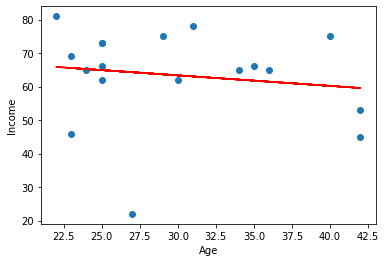

Since there is a weak negative correlation between 
Age and Income with r value: -0.14787411576068246, 
if for example, the Age increases from 42.0 years to 52.0 years 
then the Income is estimated to decrease to 56.44 points.


In [24]:
url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
county_level_df = create_dataframe(url, db_type='excel', sheetname='county-level')
# Create x, y variable
x = county_level_df['Age']
y = county_level_df['Income']

# Get regression values
regr_values, slope, intercept, r_value, p_value = show_regression(x,y)
# Display
show_corr_scatterplot(x, y, slope, intercept, x.name, y.name)

# Few esimated predictions here
x_max = x.max()
x_est = x_max + 10
y_est = round((slope * x_est + intercept), 2)

print(f'Since there is a weak negative correlation between \
\nAge and Income with r value: {r_value}, \
\nif for example, the Age increases from {x_max} years to {x_est} years \
\nthen the Income is estimated to decrease to {y_est} points.')

# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)